In [1]:
pwd()
using Pkg; Pkg.activate("../")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`
┌ Info: Precompiling FermiCG [855c3b3a-d9bb-4919-8b00-0b3cfbdffb6f]
└ @ Base loading.jl:1423


28-element Vector{String}:
 ".ipynb_checkpoints"
 "Cr_data_svp.h5"
 "Cr_uhf2_act_loc.molden"
 "PAH18-1.ipynb"
 "Untitled.ipynb"
 "act_sorted.molden"
 "benzene-10mer.ipynb"
 "benzene-10mer_act.molden"
 "benzene-10mer_doc.molden"
 "benzene-10mer_rhf.molden"
 "benzene_10mer.jld2"
 "benzene_10mer_act_sorted.molden"
 "benzene_10mer_cmf.molden"
 ⋮
 "cmf_h6.jl"
 "cr-def2svp.fchk"
 "cr_freedman_def2-svp-2-uhf.ipynb"
 "cr_freedman_def2-svp-2.ipynb"
 "cr_qubit_scf.ipynb"
 "davidson.jl"
 "fci_h6.jl"
 "fe2s2"
 "fe2s2-Copy1.ipynb"
 "fe2s2.ipynb"
 "statprof"
 "subdivide.molden"

In [3]:
# Load data for a square Helium cluster with cc-pvdz (20, orbitals)
@load "../test/_testdata_cmf_he4.jld2"


# Create a Block Sparse Tucker state, targetting 5 roots
v = FermiCG.BSTstate(clusters, FermiCG.FockConfig(init_fspace), cluster_bases, R=5)


# Add single Helium excited states into the initial basis
FermiCG.add_single_excitons!(v, FermiCG.FockConfig(init_fspace), cluster_bases)


# Randomize initial vector coefficients
FermiCG.randomize!(v)
FermiCG.orthonormalize!(v)


# Solve for the 5 lowest roots in the current "excitonic" basis
e_ci, v = FermiCG.ci_solve(v, cluster_ops, clustered_ham);


# Define a grid of lambda values
lambda_grid = [collect(0:10)...]/10.0

UnitRange{Int64}[1:1, 1:1, 1:1, 1:1]
TuckerConfig{4}((1:1, 1:1, 1:1, 1:1))
 |== BST CI ========================================================
 Solve CI with # variables:                                77
 Cache Hamiltonian:                                  8.763060 seconds (33.03 M allocations: 1.806 GiB, 6.99% gc time, 98.51% compilation time)
 Iter:   1 SS: 5    E:  -13.77404792   -13.48541506   -13.20910582   -13.01332211   -12.84520096   R: 1.5e+00  1.1e+00  1.2e+00  1.2e+00  1.3e+00   LinDep: 6.7e-16* 
 Iter:   2 SS: 10   E:  -15.75288965   -14.87159669   -14.41314599   -14.31073304   -14.19542842   R: 1.4e+00  7.6e-01  8.0e-01  6.2e-01  6.3e-01   LinDep: 5.6e-16* 
 Iter:   3 SS: 15   E:  -16.77090787   -15.19506768   -14.92255019   -14.73359168   -14.56820424   R: 6.0e-01  4.6e-01  6.4e-01  7.0e-01  5.8e-01   LinDep: 1.1e-15* 
 Iter:   4 SS: 20   E:  -16.87591827   -15.34455067   -15.29649269   -15.23382529   -15.07180707   R: 1.6e-01  1.4e-01  2.8e-01  4.1e-01  3.9e-01   LinDe

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [4]:
# Compute the BST state for each value of lambda. 
# Keep in mind that BST will adaptively keep/discard wavefunction Tucker factors as needed. 
# As such, larger values of lambda will necessarily become more expensive.
lvec, evec, dvec, dims, times = FermiCG.compute_ac(v, cluster_ops, clustered_ham, lambda_grid,
                                                   thresh_var = 1e-1,
                                                   thresh_foi = 1e-5,
                                                   thresh_pt = 1e-4
                                                  )

# lvec = vector of lambda values
# evec = vector of energy values
# dvec = vector of derivative values <lambda|H-H0|lambda>
# dims = vector of wavefunction dimensions (number of variational parameters)
# times = vector of wavefunction computation times

 λ =   0.00000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                                77 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.005597 seconds (92.47 k allocations: 7.660 MiB)
 Compute <S^2>:                                      0.081236 seconds (195.83 k allocations: 12.756 MiB, 97.53% compilation time)
  Root       Energy           S2
     1 -11.55006458   0.00000000
     2 -10.03838920   2.00000000
     3 -10.03580088   2.00000000
     4 -10.03584320   2.00000000
     5 -10.03332226   2.

 Cache Hamiltonian:                                  0.074961 seconds (18.40 k allocations: 184.260 MiB, 40.80% gc time)
 Iter:   1 SS: 5    E:  -11.55006458*  -10.03850889*  -10.03584320*  -10.03584320*  -10.03316025*  R: 4.2e-15* 1.4e-15* 3.6e-15* 1.8e-15* 2.5e-15*  LinDep: 2.2e-16* 
 Diagonalization time:                               0.004326 seconds
 Compute <S^2>:                                      0.001777 seconds (25.07 k allocations: 3.319 MiB)
  Root       Energy           S2
     1 -11.55006458   0.00000000
     2 -10.03850889   2.00000000
     3 -10.03584320   2.00000000
     4 -10.03584320   2.00000000
     5 -10.03316025   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.002601 seconds (25.07 k allocations: 3.319 MiB)
 E(Reference):       -11.55006458 -10.03850889 -10.03584320 -10.03584320 -10.03316025 
 E(PT2):             -11.55006458 -10.03850889 -10.03584320 -10.03584320 -10.033160

 Diagonalization time:                               3.571351 seconds
 Compute <S^2>:                                      0.024925 seconds (401.95 k allocations: 28.285 MiB)
  Root       Energy           S2
     1 -12.08358882   0.00000004
     2 -10.57238969   2.00000000
     3 -10.56975007   2.00000011
     4 -10.56974923   1.99999989
     5 -10.56709322   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.026008 seconds (402.02 k allocations: 28.288 MiB)
 E(Reference):       -12.08357993 -10.57202424 -10.56935855 -10.56935855 -10.56667560 
 E(PT2):             -12.08353536 -10.57216001 -10.56950396 -10.56950396 -10.56683094 
 E(BST):             -12.08358882 -10.57238969 -10.56975007 -10.56974923 -10.56709322 




     BST Iteration:    2 epsilon:   0.10000000
 Ref state compressed from:                               237 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                 

 λ =   0.20000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                               237 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.005137 seconds (96.13 k allocations: 7.833 MiB)
 Compute <S^2>:                                      0.001963 seconds (25.42 k allocations: 3.349 MiB)
  Root       Energy           S2
     1 -12.61709528   0.00000000
     2 -11.10553865   2.00000000
     3 -11.10287379   2.00000000
     4 -11.10287375   2.00000000
     5 -11.10019214   2.00000000

 Compute FOIS. Re

 Build exact <X|V|0>:                                0.044174 seconds (756.51 k allocations: 97.400 MiB)
 Compute <0|H0|0>:                                   0.001240 seconds (13.80 k allocations: 2.623 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -12.61709528 -11.55006458
     2 -11.10551405 -10.03849803
     3 -11.10286373 -10.03583911
     4 -11.10287371 -10.03584320
     5 -11.10022684 -10.03317521
 Compute <X|F|0>:                                    0.001837 seconds (23.29 k allocations: 3.653 MiB)
 Cache zeroth-order Hamiltonian:                     0.029082 seconds (42.31 k allocations: 188.397 MiB)
 Time to solve for PT1 with conjugate gradient:      0.095289 seconds
 Time to solve for PT1 with conjugate gradient:      0.149143 seconds
 Time to solve for PT1 with conjugate gradient:      0.162680 seconds
 Time to solve for PT1 with conjugate gradient:      0.135132 seconds
 Time to solve for PT1 with conjugate gradient:      0.146764 seconds
 Compute <0|H|1>:                   

 Compute <X|F|0>:                                    0.003234 seconds (23.29 k allocations: 3.654 MiB)
 Cache zeroth-order Hamiltonian:                     0.241809 seconds (45.30 k allocations: 188.830 MiB, 82.34% gc time)
 Time to solve for PT1 with conjugate gradient:      0.094636 seconds
 Time to solve for PT1 with conjugate gradient:      0.183996 seconds
 Time to solve for PT1 with conjugate gradient:      0.172488 seconds
 Time to solve for PT1 with conjugate gradient:      0.157922 seconds
 Time to solve for PT1 with conjugate gradient:      0.362281 seconds
 Compute <0|H|1>:                                    0.055987 seconds (872.92 k allocations: 72.211 MiB)
 State   1: E(PT2) corr:                           0.00026532
 State   2: E(PT2) corr:                          -0.00124857
 State   3: E(PT2) corr:                          -0.00132019
 State   4: E(PT2) corr:                          -0.00130795
 State   5: E(PT2) corr:                          -0.00136092
 State   1:

 Cache Hamiltonian:                                  0.314745 seconds (2.45 M allocations: 396.473 MiB)
 Iter:   1 SS: 5    E:  -13.14925624   -11.64105504   -11.63852412   -11.63851730   -11.63596448   R: 8.2e-02  3.5e-02  3.6e-02  3.6e-02  3.7e-02   LinDep: 1.1e-16* 
 Iter:   2 SS: 10   E:  -13.15065130   -11.64242697   -11.63994040   -11.63990458   -11.63734142   R: 1.3e-02  2.3e-02  2.3e-02  2.3e-02  2.2e-02   LinDep: 1.1e-16* 
 Iter:   3 SS: 15   E:  -13.15069031   -11.64259313   -11.64011165   -11.64007802   -11.63751548   R: 3.6e-03  1.1e-02  1.1e-02  1.1e-02  1.2e-02   LinDep: 5.6e-16* 
 Iter:   4 SS: 20   E:  -13.15069444   -11.64263334   -11.64015628   -11.64012291   -11.63756473   R: 1.3e-03  4.1e-03  4.2e-03  4.1e-03  4.2e-03   LinDep: 6.7e-16* 
 Iter:   5 SS: 25   E:  -13.15069479   -11.64263758   -11.64016056   -11.64012708   -11.63756923   R: 2.6e-04  1.3e-03  1.3e-03  1.2e-03  1.4e-03   LinDep: 3.9e-15* 
 Iter:   6 SS: 30   E:  -13.15069480   -11.64263822   -11.64016112

 Cache Hamiltonian:                                  0.362304 seconds (2.96 M allocations: 423.678 MiB)
 Iter:   1 SS: 5    E:  -13.68225375   -12.17618473   -12.17373418   -12.17370795   -12.17120076   R: 9.7e-02  4.8e-02  4.9e-02  4.9e-02  4.9e-02   LinDep: 0.0e+00* 
 Iter:   2 SS: 10   E:  -13.68421387   -12.17890547   -12.17641148   -12.17630009   -12.17357053   R: 1.6e-02  3.3e-02  3.2e-02  3.2e-02  3.0e-02   LinDep: 1.2e-15* 
 Iter:   3 SS: 15   E:  -13.68426982   -12.17924017   -12.17674746   -12.17663817   -12.17389188   R: 4.3e-03  1.5e-02  1.6e-02  1.6e-02  1.7e-02   LinDep: 2.2e-16* 
 Iter:   4 SS: 20   E:  -13.68427580   -12.17932430   -12.17683931   -12.17673060   -12.17398912   R: 1.6e-03  6.2e-03  6.2e-03  6.2e-03  6.0e-03   LinDep: 1.6e-15* 
 Iter:   5 SS: 25   E:  -13.68427630   -12.17933438   -12.17684957   -12.17674071   -12.17399861   R: 3.2e-04  2.3e-03  2.4e-03  2.4e-03  2.1e-03   LinDep: 2.6e-15* 
 Iter:   6 SS: 30   E:  -13.68427632   -12.17933666   -12.17685207

 Iter:   9 SS: 44   E:  -13.68427632*  -12.17933759   -12.17685334   -12.17674455   -12.17400083   R: 7.8e-06* 6.6e-05  7.8e-05  8.8e-05  5.9e-05   LinDep: 5.9e-15* 
 Iter:  10 SS: 48   E:  -13.68427632*  -12.17933760   -12.17685334   -12.17674456   -12.17400083   R: 7.8e-06* 1.4e-05  1.9e-05  2.6e-05  1.5e-05   LinDep: 1.1e-14* 
 Iter:  11 SS: 52   E:  -13.68427632*  -12.17933760*  -12.17685334   -12.17674456   -12.17400083*  R: 7.8e-06* 7.7e-06* 1.1e-05  1.9e-05  7.9e-06*  LinDep: 8.7e-15* 
 Iter:  12 SS: 54   E:  -13.68427632*  -12.17933760*  -12.17685334*  -12.17674456   -12.17400083*  R: 7.8e-06* 7.9e-06* 7.2e-06* 1.4e-05  7.5e-06*  LinDep: 1.1e-14* 
 Iter:  13 SS: 55   E:  -13.68427632*  -12.17933760*  -12.17685334*  -12.17674456*  -12.17400083*  R: 7.8e-06* 7.9e-06* 7.2e-06* 4.4e-06* 7.5e-06*  LinDep: 1.0e-14* 
 Diagonalization time:                               1.998089 seconds
 Compute <S^2>:                                      0.027471 seconds (488.24 k allocations: 39.745 

 Iter:   7 SS: 35   E:  -14.21787781   -12.71745157   -12.71460632   -12.71441541   -12.71109767   R: 5.1e-05  1.4e-03  1.3e-03  1.6e-03  1.1e-03   LinDep: 6.7e-16* 
 Iter:   8 SS: 40   E:  -14.21787781   -12.71745221   -12.71460696   -12.71441643   -12.71109818   R: 1.3e-05  4.0e-04  4.1e-04  5.1e-04  4.3e-04   LinDep: 1.2e-15* 
 Iter:   9 SS: 45   E:  -14.21787781*  -12.71745225   -12.71460699   -12.71441649   -12.71109822   R: 5.8e-06* 1.1e-04  1.2e-04  1.7e-04  1.3e-04   LinDep: 6.3e-15* 
 Iter:  10 SS: 49   E:  -14.21787781*  -12.71745225   -12.71460700   -12.71441649   -12.71109822   R: 5.8e-06* 2.8e-05  5.2e-05  7.4e-05  4.6e-05   LinDep: 1.2e-14* 
 Iter:  11 SS: 53   E:  -14.21787781*  -12.71745226   -12.71460700   -12.71441649   -12.71109822   R: 5.8e-06* 1.5e-05  3.1e-05  4.4e-05  1.8e-05   LinDep: 6.3e-15* 
 Iter:  12 SS: 57   E:  -14.21787781*  -12.71745226*  -12.71460700   -12.71441649   -12.71109822*  R: 5.8e-06* 6.4e-06* 1.8e-05  2.9e-05  8.6e-06*  LinDep: 6.8e-15* 
 Ite

 Diagonalization time:                               3.074633 seconds
 Compute <S^2>:                                      0.028150 seconds (502.99 k allocations: 41.959 MiB)
  Root       Energy           S2
     1 -14.21787781   0.00000027
     2 -12.71745225   2.00000000
     3 -12.71460699   2.00000000
     4 -12.71441649   2.00000000
     5 -12.71109821   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.030184 seconds (503.85 k allocations: 42.005 MiB)
 E(Reference):       -14.21764133 -12.70467036 -12.70345255 -12.70341949 -12.70212011 
 E(PT2):             -14.21709078 -12.70883910 -12.70714141 -12.70705255 -12.70517894 
 E(BST):             -14.21787781 -12.71745225 -12.71460699 -12.71441649 -12.71109821 

*Converged E(Ref):             -14.21764133 -12.70467036 -12.70345255 -12.70341949 -12.70212011 
*Converged E(BST):             -14.21787781 -12.71745225 -12.71460699 -12.71441649 -12.7110982

 Iter:  13 SS: 5    E:  -14.75149945*  -13.25730831*  -13.25353270   -13.25330780   -13.24894729   R: 8.5e-06* 8.2e-06* 1.6e-05  3.1e-05  1.3e-05   LinDep: 8.9e-15* 
 Iter:  14 SS: 7    E:  -14.75149945*  -13.25730831*  -13.25353270*  -13.25330780   -13.24894729*  R: 8.5e-06* 4.0e-06* 5.2e-06* 1.3e-05  6.9e-06*  LinDep: 9.3e-15* 
 Iter:  15 SS: 8    E:  -14.75149945*  -13.25730831*  -13.25353270*  -13.25330780*  -13.24894729*  R: 8.5e-06* 4.0e-06* 5.2e-06* 7.4e-06* 6.9e-06*  LinDep: 1.0e-14* 
 Diagonalization time:                               4.651303 seconds
 Compute <S^2>:                                      0.036330 seconds (516.94 k allocations: 43.304 MiB)
  Root       Energy           S2
     1 -14.75149945   0.00000017
     2 -13.25730831   2.00000000
     3 -13.25353270   2.00000000
     4 -13.25330780   2.00000000
     5 -13.24894729   2.00000000
 ==================================================================|
 Compute <S^2>:                                      0.02578

 λ =   0.70000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                              1029 → 5          (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.007365 seconds (91.99 k allocations: 7.637 MiB)
 Compute <S^2>:                                      0.002335 seconds (25.42 k allocations: 3.353 MiB)
  Root       Energy           S2
     1 -15.28467202   0.00000000
     2 -13.77066844   2.00000000
     3 -13.77074092   2.00000000
     4 -13.77045001   2.00000000
     5 -13.76992593   2.00000000

 Compute FOIS. Re


 Compute FOIS. Reference space dim:                         5
 Number of tasks:                                         253
 Compute tasks:                                      0.267871 seconds (1.89 M allocations: 356.543 MiB)
 Add results together:                               0.118656 seconds (379.62 k allocations: 169.204 MiB)
 Total time spent building FOIS:                     0.390843 seconds
 FOIS compressed from:                                  37564 → 19796      (thresh =  1.0e-05)
     1 -15.28467202
     2 -13.77015205
     3 -13.77084649
     4 -13.77045001
     5 -13.77033676

 PT vector reference space dim:                             5
 Length of input      FOIS:                             19796
 Build exact <X|V|0>:                                0.050283 seconds (767.79 k allocations: 124.674 MiB)
 Compute <0|H0|0>:                                   0.001530 seconds (13.80 k allocations: 2.623 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -15.28467202 -11.55006458


 Compute zeroth-order energy:                        0.005845 seconds (92.27 k allocations: 7.655 MiB)
 Compute <S^2>:                                      0.002815 seconds (25.42 k allocations: 3.349 MiB)
  Root       Energy           S2
     1 -15.81818737   0.00000000
     2 -14.30357889   2.00000000
     3 -14.30436112   2.00000000
     4 -14.30396526   2.00000000
     5 -14.30394141   2.00000000

 Compute FOIS. Reference space dim:                         5
 Number of tasks:                                         253
 Compute tasks:                                      0.270201 seconds (1.89 M allocations: 360.591 MiB)
 Add results together:                               0.121973 seconds (422.80 k allocations: 174.505 MiB, 12.16% compilation time)
 Total time spent building FOIS:                     0.394573 seconds
 FOIS compressed from:                                  42071 → 21701      (thresh =  1.0e-05)
     1 -15.81818737
     2 -14.30357889
     3 -14.30436112
     4 -14.

 Build exact <X|V|0>:                                0.207884 seconds (2.68 M allocations: 580.121 MiB)
 Compute <0|H0|0>:                                   0.002603 seconds (43.05 k allocations: 4.292 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -15.81820565 -11.55003905
     2 -14.34094361  -9.98852966
     3 -14.33400310  -9.99944337
     4 -14.33380628  -9.99858262
     5 -14.32633770 -10.00854498
 Compute <X|F|0>:                                    0.007347 seconds (86.58 k allocations: 16.355 MiB)
 Cache zeroth-order Hamiltonian:                     0.296449 seconds (42.29 k allocations: 189.223 MiB, 83.57% gc time)
 Time to solve for PT1 with conjugate gradient:      0.685206 seconds
 Time to solve for PT1 with conjugate gradient:      1.007651 seconds
 Time to solve for PT1 with conjugate gradient:      1.247364 seconds
 Time to solve for PT1 with conjugate gradient:      0.688252 seconds
 Time to solve for PT1 with conjugate gradient:      2.250395 seconds
 Compute <0|H|1>:   

 Compute <X|F|0>:                                    0.006249 seconds (86.57 k allocations: 16.354 MiB)
 Cache zeroth-order Hamiltonian:                     0.045589 seconds (42.30 k allocations: 189.225 MiB)
 Time to solve for PT1 with conjugate gradient:      1.350109 seconds
 Time to solve for PT1 with conjugate gradient:      1.662161 seconds
 Time to solve for PT1 with conjugate gradient:      1.980414 seconds
 Time to solve for PT1 with conjugate gradient:      1.453766 seconds
 Time to solve for PT1 with conjugate gradient:      1.573502 seconds
 Compute <0|H|1>:                                    0.390420 seconds (2.78 M allocations: 396.269 MiB)
 State   1: E(PT2) corr:                          -0.00030528
 State   2: E(PT2) corr:                          -0.00005414
 State   3: E(PT2) corr:                          -0.00028760
 State   4: E(PT2) corr:                          -0.00030203
 State   5: E(PT2) corr:                          -0.00052614
 State   1: E(PT2):        


 Compute FOIS. Reference space dim:                        21
 Number of tasks:                                         253
 Compute tasks:                                      0.863186 seconds (5.50 M allocations: 1.006 GiB)
 Add results together:                               1.724900 seconds (981.60 k allocations: 811.147 MiB, 75.25% gc time, 0.99% compilation time)
 Total time spent building FOIS:                     2.591450 seconds
 FOIS compressed from:                                 283215 → 62092      (thresh =  1.0e-05)
     1 -16.35172653
     2 -14.88537012
     3 -14.87610484
     4 -14.87599172
     5 -14.86626405

 PT vector reference space dim:                            21
 Length of input      FOIS:                             62092
 Build exact <X|V|0>:                                0.221145 seconds (2.70 M allocations: 584.019 MiB)
 Compute <0|H0|0>:                                   0.002551 seconds (43.05 k allocations: 4.292 MiB)
  Root      <0|H|0>      <0|F|

 Total time spent building FOIS:                     2.004598 seconds
 FOIS compressed from:                                 240237 → 64813      (thresh =  1.0e-05)
     1 -16.35172640
     2 -14.88567614
     3 -14.87636976
     4 -14.87650392
     5 -14.86669758

 PT vector reference space dim:                            21
 Length of input      FOIS:                             64813
 Build exact <X|V|0>:                                0.285107 seconds (2.66 M allocations: 619.106 MiB, 27.46% gc time)
 Compute <0|H0|0>:                                   0.002607 seconds (43.05 k allocations: 4.292 MiB)
  Root      <0|H|0>      <0|F|0>
     1 -16.35172640 -11.55003060
     2 -14.88567758  -9.97136602
     3 -14.87637181  -9.98512191
     4 -14.87650744  -9.98614276
     5 -14.86669392  -9.99903964
 Compute <X|F|0>:                                    0.005777 seconds (86.58 k allocations: 16.961 MiB)
 Cache zeroth-order Hamiltonian:                     0.681214 seconds (42.30 k alloca

 λ =   1.00000000
 Remove duplicates
 Number of terms reduced from   476 to   476
 max_iter         : 20
 max_iter_pt      : 200
 nbody            : 4
 H0               : Hcmf
 thresh_var       : 0.1
 thresh_foi       : 1.0e-5
 thresh_pt        : 0.0001
 ci_conv          : 1.0e-5
 ci_max_iter      : 50
 ci_max_ss_vecs   : 12
 ci_lindep_thresh : 1.0e-10
 resolve_ss       : false
 do_pt            : true
 tol_tucker       : 0.0001



     BST Iteration:    1 epsilon:   0.10000000
 Ref state compressed from:                              2471 → 21         (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.045547 seconds (748.30 k allocations: 60.279 MiB)
 Compute <S^2>:                                      0.004221 seconds (72.61 k allocations: 6.387 MiB)
  Root       Energy           S2
     1 -16.88524816   0.00000000
     2 -15.43172417   2.00000000
     3 -15.41985184   2.00000000
     4 -15.41989149   2.00000000
     5 -15.40754987   2.00000000

 Compute FOIS. 

  Root       Energy           S2
     1 -16.88619215   0.00000048
     2 -15.43606980   2.00000003
     3 -15.42319207   2.00000000
     4 -15.42293590   2.00000000
     5 -15.40968378   2.00000003
 ==================================================================|
 Compute <S^2>:                                      0.067327 seconds (1.04 M allocations: 92.631 MiB)
 E(Reference):       -16.88524816 -15.43172417 -15.41985184 -15.41989149 -15.40754987 
 E(PT2):             -16.88570115 -15.43444882 -15.42247040 -15.42246341 -15.40997073 
 E(BST):             -16.88619215 -15.43606980 -15.42319207 -15.42293590 -15.40968378 




     BST Iteration:    2 epsilon:   0.10000000
 Ref state compressed from:                              3095 → 21         (thresh =  1.0e-01)
 Compute zeroth-order energy:                        0.045746 seconds (748.82 k allocations: 60.607 MiB)
 Compute <S^2>:                                      0.057503 seconds (72.49 k allocations: 6.319 MiB, 92.67% gc time)

 Iter:  23 SS: 36   E:  -16.88619221*  -15.43610603*  -15.42321778*  -15.42295735*  -15.40969651*  R: 8.0e-06* 6.4e-06* 5.9e-06* 7.0e-06* 8.8e-06*  LinDep: 4.4e-15* 
 Diagonalization time:                              15.347139 seconds
 Compute <S^2>:                                      0.058269 seconds (1.07 M allocations: 98.551 MiB)
  Root       Energy           S2
     1 -16.88619221   0.00000051
     2 -15.43610603   2.00000003
     3 -15.42321778   2.00000000
     4 -15.42295735   2.00000000
     5 -15.40969651   2.00000003
 ==================================================================|
 Compute <S^2>:                                      0.061009 seconds (1.06 M allocations: 97.667 MiB)
 E(Reference):       -16.88524796 -15.43175779 -15.42007445 -15.42014539 -15.40792931 
 E(PT2):             -16.88572452 -15.43180470 -15.42052401 -15.42055075 -15.40870779 
 E(BST):             -16.88619221 -15.43610603 -15.42321778 -15.42295735 -15.40969651 

*Converged E(Ref):           

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [-16.8852180672691 -15.373662375706857 … -15.37099668271147 -15.36831373214339; -16.885226950799073 -15.374027826817105 … -15.371387524011265 -15.36873135857596; … ; -16.88600300641547 -15.421905881041543 … -15.411818332452908 -15.401376135037491; -16.886192214909403 -15.436106026493771 … -15.42295734788373 -15.409696512035897], [-5.329070518200751e-15 -1.4210854715202004e-14 … 2.1927348825556692e-11 -1.7763568394002505e-14; -0.00017806956871524449 -0.0074078717848795606 … -0.007923042502184785 -0.008454463064865081; … ; -0.0017841636495017354 -0.13070199956041506 … -0.10276495162111488 -0.0768318148057201; -0.001998648981057727 -0.15227893160929895 … -0.11979035964107254 -0.08939358895437266], [5, 237, 674, 765, 854, 969, 1029, 1261, 1790, 2471, 3493], [72.042913382, 35.754039511, 8.731177358, 10.369129662, 11.629841027, 12.18990999, 12.221883528, 12.996833659, 72.354983529, 54.781412501, 46.544426462])

In [10]:
# fit the results to a quadratic function
fits = FermiCG.quadratic_fits(lvec, dvec, evec);


 ----------- Root   1 -----------
 Estimate from λ=  0.10000000: E(corr) =  -0.00094030 E(tot) = -16.88615837 
 Estimate from λ=  0.20000000: E(corr) =  -0.00110460 E(tot) = -16.88632267 
 Estimate from λ=  0.30000000: E(corr) =  -0.00101493 E(tot) = -16.88623300 
 Estimate from λ=  0.40000000: E(corr) =  -0.00098054 E(tot) = -16.88619861 
 Estimate from λ=  0.50000000: E(corr) =  -0.00097328 E(tot) = -16.88619135 
 Estimate from λ=  0.60000000: E(corr) =  -0.00097146 E(tot) = -16.88618953 
 Estimate from λ=  0.70000000: E(corr) =  -0.00097113 E(tot) = -16.88618920 
 Estimate from λ=  0.80000000: E(corr) =  -0.00097080 E(tot) = -16.88618886 
 Estimate from λ=  0.90000000: E(corr) =  -0.00097077 E(tot) = -16.88618884 
 Estimate from λ=  1.00000000: E(corr) =  -0.00097073 E(tot) = -16.88618880 

 ----------- Root   2 -----------
 Estimate from λ=  0.10000000: E(corr) =  -0.03911747 E(tot) = -15.41277985 
 Estimate from λ=  0.20000000: E(corr) =  -0.05042998 E(tot) = -15.42409235 
 Estim

In [17]:
using Printf

# Define function for printing the fit of each root.
# 
function plot_fits(r, fits, dE, lvec)
    #p1 = plot()
    p1 = plot(lvec, dE[:,r], markershape=:circle)
    for l in 1:length(fits)
        plot!(p1, fits[r][l], 0, 1, legend=false, linealpha=l/10, color=:black)
    end
    plot!(p1, title=@sprintf("Root %4i", r))
    plot!(p1, xaxis="λ")
    plot!(p1, yaxis="∂/∂λ E")
    return p1
end


plot_fits (generic function with 1 method)

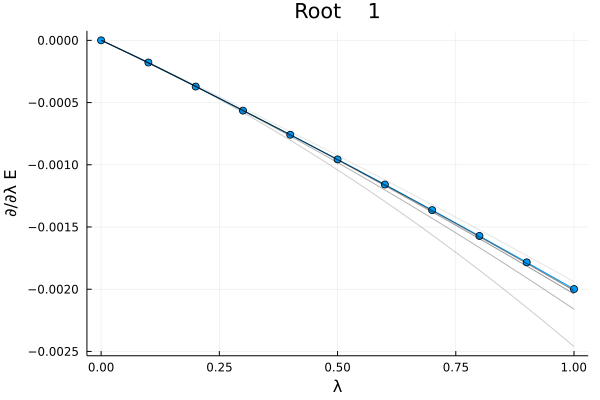

In [18]:
plot_fits(1, fits, dvec, lvec)

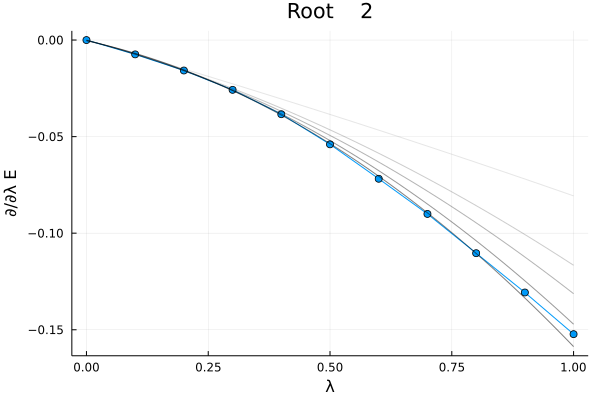

In [19]:
plot_fits(2, fits, dvec, lvec)

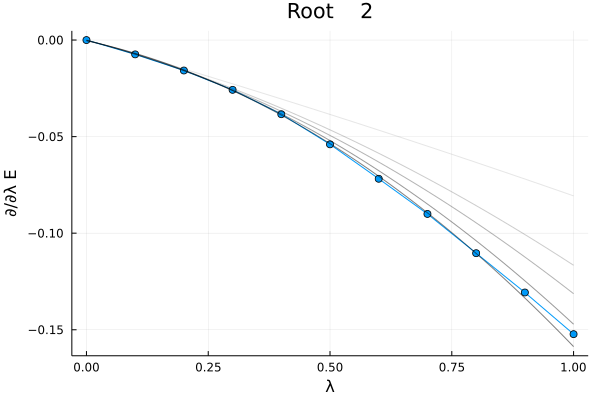

In [20]:
plot_fits(3, fits, dvec, lvec)

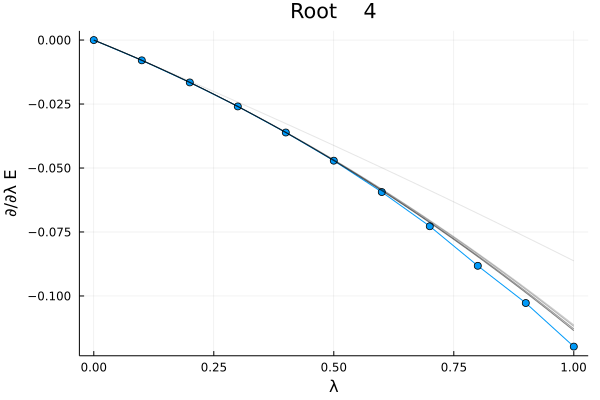

In [21]:
plot_fits(4, fits, dvec, lvec)

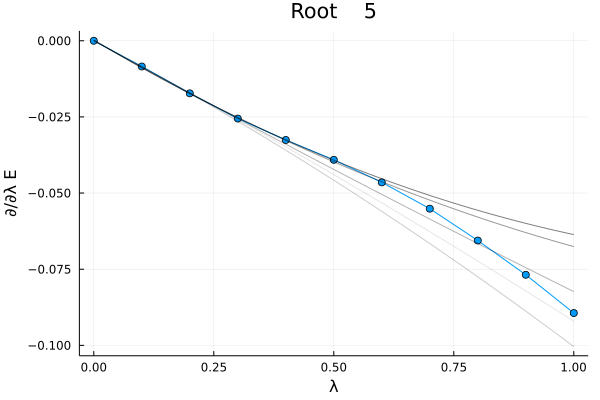

In [22]:
plot_fits(5, fits, dvec, lvec)